In [6]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # Supress warnings
import numpy as np
warnings.filterwarnings('ignore')

df = pd.read_csv("./files/Aquifer_Petrignano.csv")
df.index = pd.to_datetime(df.Date, format = '%d/%m/%Y', )
df = df.drop(['Date'], axis=1)

In [7]:
df

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4


In [8]:
# Drop data before 2009 for the purpose of this tutorial
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
from datetime import datetime, date


In [5]:
df.to_csv('files/plain_data.csv')

In [10]:
df['River_Hydrometry'] = df['River_Hydrometry'].replace(0.0, np.nan)
df['Drainage_Volume'] = df['Drainage_Volume'].replace(0.0, np.nan)

df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...
2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
2020-06-28,0.0,-25.19,26.9,-32120.928,2.4


In [11]:
df.to_csv('files/interpolated_data.csv')

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns, index=df.index)
scaled_df.to_csv('files/scaled_data.csv')

In [16]:
scaled_df = pd.read_csv('files/scaled_data.csv', index_col=0)

In [14]:
import joblib

joblib.dump(scaler, 'files/scaler.joblib')

['files/scaler.joblib']

In [15]:
loaded_scaler = joblib.load('files/scaler.joblib')

In [17]:
unscaled_values = loaded_scaler.inverse_transform(scaled_df.values)
unscaled_df = pd.DataFrame(unscaled_values, columns=df.columns, index=df.index)

In [18]:
unscaled_df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...
2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
2020-06-28,0.0,-25.19,26.9,-32120.928,2.4


In [19]:
aggregation = {
    'Rainfall': 'sum',
    'Depth_to_Groundwater': 'mean',
    'Temperature': 'mean',
    'Drainage_Volume': 'sum',
    'River_Hydrometry': 'mean',
}
weekly_df = df.resample('W').agg(aggregation)
monthly_df = df.resample('M').agg(aggregation)
yearly_df = df.resample('Y').agg(aggregation)

print("Original DataFrame:")
print(df)
print("\nWeekly Resampled DataFrame:")
print(weekly_df)
print("\nMonthly Resampled DataFrame:")
print(monthly_df)

Original DataFrame:
            Rainfall  Depth_to_Groundwater  Temperature  Drainage_Volume  \
Date                                                                       
2009-01-01       0.0                -31.14          5.2       -24530.688   
2009-01-02       0.0                -31.11          2.3       -28785.888   
2009-01-03       0.0                -31.07          4.4       -25766.208   
2009-01-04       0.0                -31.05          0.8       -27919.296   
2009-01-05       0.0                -31.01         -1.9       -29854.656   
...              ...                   ...          ...              ...   
2020-06-26       0.0                -25.07         25.7       -29930.688   
2020-06-27       0.0                -25.11         26.2       -31332.960   
2020-06-28       0.0                -25.19         26.9       -32120.928   
2020-06-29       0.0                -25.18         26.9       -30602.880   
2020-06-30       0.0                -25.25         27.3       -31878

In [22]:

monthly_df.to_csv('files/interploated_m.csv')

In [31]:
df = df_trimmed
from sklearn.preprocessing import MinMaxScaler
import joblib
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns, index=df.index)
scaled_df.to_csv('files/scaled_w.csv')


joblib.dump(scaler, 'files/scaler_w.joblib')

['files/scaler_w.joblib']

In [ ]:
scaled_df = pd.read_csv('files/scaled_data.csv', index_col=0)
loaded_scaler = joblib.load('files/scaler.joblib')
unscaled_values = loaded_scaler.inverse_transform(scaled_df.values)
unscaled_df = pd.DataFrame(unscaled_values, columns=df.columns, index=df.index)

In [24]:
df = pd.read_csv('files/interploated_w.csv', index_col=0)


In [25]:
df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-04,0.0,-31.092500,3.175000,-107002.080,2.425000
2009-01-11,0.9,-30.934286,1.914286,-212164.704,2.314286
2009-01-18,1.2,-30.598571,5.485714,-196624.800,2.300000
2009-01-25,4.2,-30.130000,8.585714,-162883.872,2.357143
2009-02-01,0.0,-29.907143,4.728571,-171409.824,2.571429
...,...,...,...,...,...
2020-06-07,19.6,-24.652857,19.271429,-179465.760,2.442857
2020-06-14,43.0,-24.724286,18.428571,-180633.888,2.771429
2020-06-21,7.4,-24.752857,20.385714,-192335.472,2.728571


In [26]:
df_trimmed = df.iloc[1:-1]

In [27]:
df_trimmed

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-11,0.9,-30.934286,1.914286,-212164.704,2.314286
2009-01-18,1.2,-30.598571,5.485714,-196624.800,2.300000
2009-01-25,4.2,-30.130000,8.585714,-162883.872,2.357143
2009-02-01,0.0,-29.907143,4.728571,-171409.824,2.571429
2009-02-08,10.4,-29.608571,8.671429,-179798.400,2.628571
...,...,...,...,...,...
2020-05-31,22.2,-24.761429,16.885714,-183938.688,2.414286
2020-06-07,19.6,-24.652857,19.271429,-179465.760,2.442857
2020-06-14,43.0,-24.724286,18.428571,-180633.888,2.771429


In [28]:
df_trimmed.to_csv('files/interploated_w.csv')

In [30]:
df = pd.read_csv("./files/scaled_m.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

In [31]:
df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-31,0.032915,0.216100,0.068714,0.726750,0.396506
2009-02-28,0.073145,0.296982,0.074975,0.936674,0.508567
2009-03-31,0.178683,0.356360,0.236094,0.627008,0.469107
2009-04-30,0.085162,0.410094,0.413676,0.693265,0.407926
2009-05-31,0.149425,0.428197,0.647873,0.400633,0.201392
...,...,...,...,...,...
2020-02-29,0.097179,0.583554,0.225748,0.736863,0.420133
2020-03-31,0.366771,0.605731,0.255726,0.721515,0.632459
2020-04-30,0.217346,0.615560,0.421868,0.896287,0.475913


In [32]:
df['year'] = df.index.year
df['month'] = df.index.month
#df['day'] = df.index.day
#df['day_of_year'] = df.index.dayofyear
#df['week_of_year'] = df.index.weekofyear
df['quarter'] = df.index.quarter
df['season'] = df.month%12 // 3 + 1

#df[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']]
#df[['year', 'month',  'week_of_year', 'quarter', 'season']]
df[['year', 'month', 'quarter', 'season']]

,year,month,quarter,season
Date,,,,
2009-01-31,2009,1,1,1
2009-02-28,2009,2,1,1
2009-03-31,2009,3,1,2
2009-04-30,2009,4,2,2
2009-05-31,2009,5,2,2
...,...,...,...,...
2020-02-29,2020,2,1,1
2020-03-31,2020,3,1,2
2020-04-30,2020,4,2,2


<Axes: xlabel='month_sin', ylabel='month_cos'>

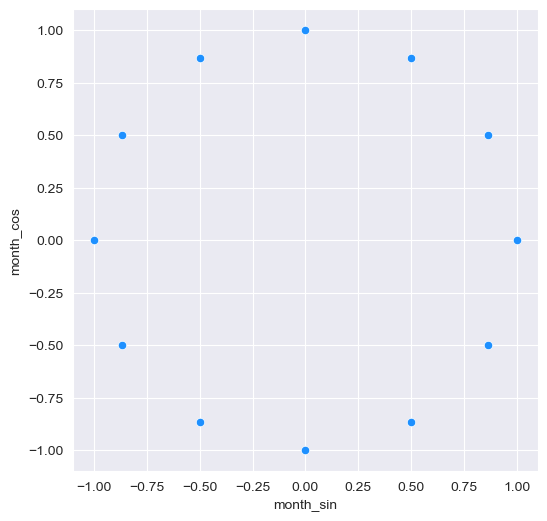

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns

month_in_year = 12
df['month_sin'] = np.sin(2 * np.pi * df.month / month_in_year)
df['month_cos'] = np.cos(2 * np.pi * df.month / month_in_year)
# days_in_month = 30
# df['day_sin'] = np.sin(2 * np.pi * df.day / days_in_month)
# df['day_cos'] = np.cos(2 * np.pi * df.day / days_in_month)

# days_in_year = 365
# df['day_of_year_sin'] = np.sin(2 * np.pi * df.day_of_year / days_in_year)
# df['day_of_year_cos'] = np.cos(2 * np.pi * df.day_of_year / days_in_year)

# weeks_in_year = 52.1429
# df['week_of_year_sin'] = np.sin(2 * np.pi * df.week_of_year / weeks_in_year)
# df['week_of_year_cos'] = np.cos(2 * np.pi * df.week_of_year / weeks_in_year)

quarters_in_year = 4
df['quarter_sin'] = np.sin(2 * np.pi * df.quarter / quarters_in_year)
df['quarter_cos'] = np.cos(2 * np.pi * df.quarter / quarters_in_year)

seasons_in_year = 4
df['season_sin'] = np.sin(2 * np.pi * df.season / seasons_in_year)
df['season_cos'] = np.cos(2 * np.pi * df.season / seasons_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')

In [34]:
df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry,year,month,quarter,season,month_sin,month_cos,quarter_sin,quarter_cos,season_sin,season_cos
Date,,,,,,,,,,,,,,,
2009-01-31,0.032915,0.216100,0.068714,0.726750,0.396506,2009,1,1,1,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
2009-02-28,0.073145,0.296982,0.074975,0.936674,0.508567,2009,2,1,1,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
2009-03-31,0.178683,0.356360,0.236094,0.627008,0.469107,2009,3,1,2,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,1.224647e-16,-1.000000e+00
2009-04-30,0.085162,0.410094,0.413676,0.693265,0.407926,2009,4,2,2,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
2009-05-31,0.149425,0.428197,0.647873,0.400633,0.201392,2009,5,2,2,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,0.097179,0.583554,0.225748,0.736863,0.420133,2020,2,1,1,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
2020-03-31,0.366771,0.605731,0.255726,0.721515,0.632459,2020,3,1,2,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,1.224647e-16,-1.000000e+00
2020-04-30,0.217346,0.615560,0.421868,0.896287,0.475913,2020,4,2,2,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00


In [35]:
df.to_csv('files/cycl_m.csv')